In [1]:
import pandas as pd
data_train = pd.read_csv("Train_Keystroke.csv")

In [2]:
# check data types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   press-0     750 non-null    int64
 1   release-0   750 non-null    int64
 2   press-1     750 non-null    int64
 3   release-1   750 non-null    int64
 4   press-2     750 non-null    int64
 5   release-2   750 non-null    int64
 6   press-3     750 non-null    int64
 7   release-3   750 non-null    int64
 8   press-4     750 non-null    int64
 9   release-4   750 non-null    int64
 10  press-5     750 non-null    int64
 11  release-5   750 non-null    int64
 12  press-6     750 non-null    int64
 13  release-6   750 non-null    int64
 14  press-7     750 non-null    int64
 15  release-7   750 non-null    int64
 16  press-8     750 non-null    int64
 17  release-8   750 non-null    int64
 18  press-9     750 non-null    int64
 19  release-9   750 non-null    int64
 20  press-10    750 non-null    int6

In [3]:
# check if there is any null values
data_train.isnull().any()

press-0       False
release-0     False
press-1       False
release-1     False
press-2       False
release-2     False
press-3       False
release-3     False
press-4       False
release-4     False
press-5       False
release-5     False
press-6       False
release-6     False
press-7       False
release-7     False
press-8       False
release-8     False
press-9       False
release-9     False
press-10      False
release-10    False
press-11      False
release-11    False
press-12      False
release-12    False
UserID        False
dtype: bool

In [4]:
import numpy as np
# check how many target that we have
np.sort(data_train.UserID.unique())

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110])

In [5]:
init_columns = data_train.columns[:-1]
init_columns

Index(['press-0', 'release-0', 'press-1', 'release-1', 'press-2', 'release-2',
       'press-3', 'release-3', 'press-4', 'release-4', 'press-5', 'release-5',
       'press-6', 'release-6', 'press-7', 'release-7', 'press-8', 'release-8',
       'press-9', 'release-9', 'press-10', 'release-10', 'press-11',
       'release-11', 'press-12', 'release-12'],
      dtype='object')

In [6]:
def calculate_press_duration(release, press):
    # Formula: press_duration(i) = R(i) - P(i)
    # calculates each press holding duration
    if len(press) == len(release):
        for i in range(len(press)):
            press_duration = int(release[i] - press[i])
            yield press_duration
    else:
        print("Lenght of array doesnt match")

def calculate_release_duration(press):
    # Formula: release_duration(i) = P(i+1)
    # calculates each release duration(non-press duration)
    for i in range(len(press)):
        release_duration = press[i]
        yield release_duration

def calculate_press2press(release, press, pressI):
    # Formula: press2press = R(i) - P(i) + P(i+1)
    # calculate press to press duration
    if len(press) == len(release):
        for i in range(len(release)):
            press2press = release[i] - press[i] + pressI[i]
            yield press2press
    else:
        print("Lenght of array doesnt match")

def calculate_release2release(release):
    # Formula: release2release = R(i+1)
    # calculate release to release duration
    for i in range(len(release)):
        release2release = release[i]
        yield release2release


In [7]:
for idx in range(len(init_columns)):
    try:
        if (idx%2 == 0) and (idx < len(init_columns)):
            #print(f"Press-Duration-{int(idx/2)} = {init_columns[int(idx+1)]} - {init_columns[int(idx)]}")
            press_duration = np.fromiter(calculate_press_duration(data_train[init_columns[int(idx+1)]].values, data_train[init_columns[int(idx)]].values), int, count=-1)
            data_train[f"press-duration-{int(idx/2)}"] = press_duration
            
            #print(f"P2P DURATION-{int(idx/2)}: {init_columns[int(idx+1)]} - {init_columns[int(idx)]} + {init_columns[int(idx+2)]}")
            p2p_duration = np.fromiter(calculate_press2press(data_train[init_columns[int(idx+1)]].values, data_train[init_columns[int(idx)]].values, data_train[init_columns[int(idx+2)]].values), int, count=-1)
            data_train[f"P2P-duration-{int(idx/2)}"] = p2p_duration

        elif idx%2 == 1 and idx < len(init_columns)-1:
            #print(f"Release-duration-{int(idx/2)} = {init_columns[idx+1]}")
            release_duration = np.fromiter(calculate_release_duration(data_train[init_columns[int(idx+1)]].values), int, count=-1)
            data_train[f"release-duration-{int(idx/2)}"] = release_duration
            
            #print(f"R2R-duration-{int(idx/2)} = {init_columns[idx+2]}")
            r2r_duration = np.fromiter(calculate_release2release(data_train[init_columns[int(idx+2)]].values), int, count=-1)
            data_train[f"R2R-duration-{int(idx/2)}"] = r2r_duration
            
    except IndexError:
        pass

In [8]:
col_list = [col for col in data_train.columns if col not in init_columns]
col_list.pop(0)
sum_col_list = [col_list[idx] for idx in range(len(col_list)) if idx%2==0]
sum_col_list

['press-duration-0',
 'release-duration-0',
 'press-duration-1',
 'release-duration-1',
 'press-duration-2',
 'release-duration-2',
 'press-duration-3',
 'release-duration-3',
 'press-duration-4',
 'release-duration-4',
 'press-duration-5',
 'release-duration-5',
 'press-duration-6',
 'release-duration-6',
 'press-duration-7',
 'release-duration-7',
 'press-duration-8',
 'release-duration-8',
 'press-duration-9',
 'release-duration-9',
 'press-duration-10',
 'release-duration-10',
 'press-duration-11',
 'release-duration-11',
 'press-duration-12']

In [9]:
# calculate total duration
data_train["total-duration"] = data_train[sum_col_list].sum(axis=1)
data_train

,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-duration-10,P2P-duration-10,release-duration-10,R2R-duration-10,press-duration-11,P2P-duration-11,release-duration-11,R2R-duration-11,press-duration-12,total-duration
0,0,166,86,271,200,296,364,513,664,752,...,229,1965,1736,1924,188,2019,1831,2035,204,14464
1,0,72,196,270,315,417,544,616,694,761,...,79,2048,1969,2040,71,2256,2185,2265,80,14619
2,0,31,418,487,623,695,780,820,1239,1319,...,49,3120,3071,3119,48,3264,3216,3263,47,24994
3,0,1,1,45,146,201,386,473,594,681,...,71,2241,2170,2240,70,2496,2426,2513,87,14812
4,0,71,312,406,1829,1926,2063,2183,2160,2263,...,176,3960,3784,3911,127,4038,3911,4058,147,33805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,69,217,303,453,525,574,689,663,817,...,83,2131,2048,2154,106,2388,2282,2350,68,16439
746,0,121,258,547,472,669,669,767,833,955,...,112,2652,2540,2607,67,2795,2728,2799,71,20448
747,0,35,795,880,959,1027,1339,1399,1531,1603,...,43,2763,2720,2763,43,2942,2899,2939,40,24330
748,0,59,175,285,368,444,514,600,673,767,...,93,2128,2035,2102,67,2341,2274,2344,70,15609


In [10]:
print(min(data_train["total-duration"]))
print(max(data_train["total-duration"]))

7080
71444


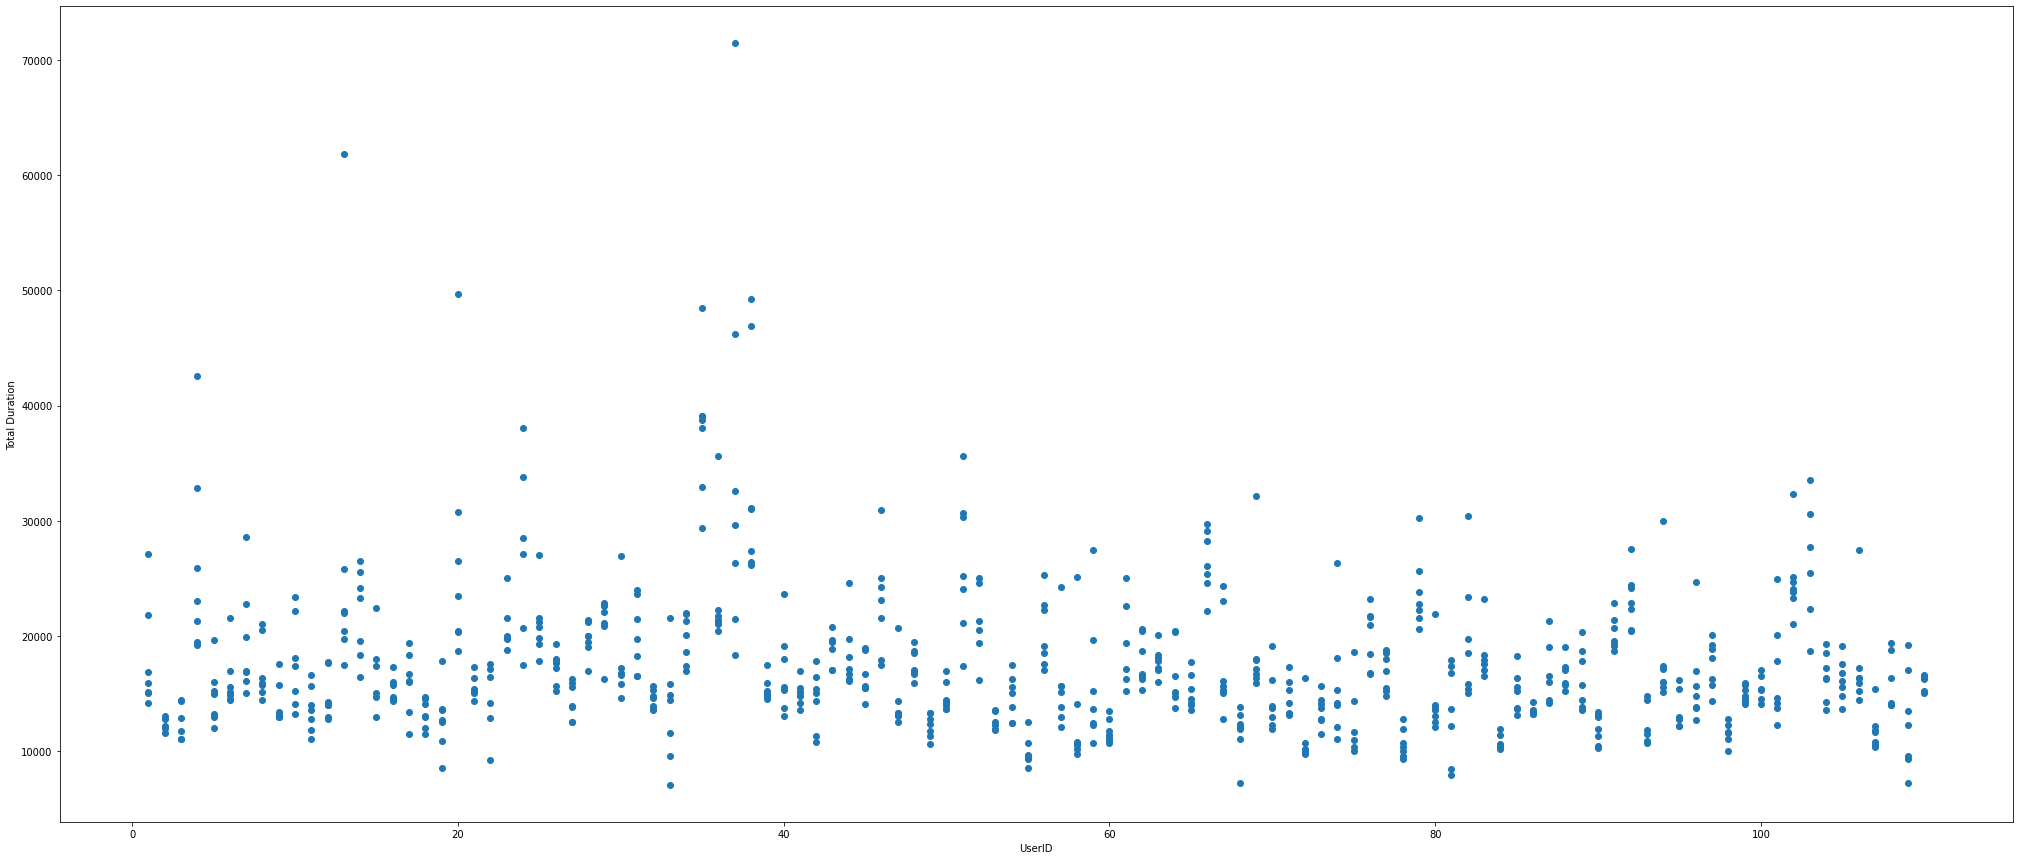

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(35,15))
plt.plot(data_train["UserID"], data_train["total-duration"], "o")
plt.xlabel("UserID")
plt.ylabel("Total Duration")
plt.show()

In [12]:
add2list = ["total-duration", "UserID"]
#add2list = ["UserID"]
col_list = col_list + add2list
col_list

['press-duration-0',
 'P2P-duration-0',
 'release-duration-0',
 'R2R-duration-0',
 'press-duration-1',
 'P2P-duration-1',
 'release-duration-1',
 'R2R-duration-1',
 'press-duration-2',
 'P2P-duration-2',
 'release-duration-2',
 'R2R-duration-2',
 'press-duration-3',
 'P2P-duration-3',
 'release-duration-3',
 'R2R-duration-3',
 'press-duration-4',
 'P2P-duration-4',
 'release-duration-4',
 'R2R-duration-4',
 'press-duration-5',
 'P2P-duration-5',
 'release-duration-5',
 'R2R-duration-5',
 'press-duration-6',
 'P2P-duration-6',
 'release-duration-6',
 'R2R-duration-6',
 'press-duration-7',
 'P2P-duration-7',
 'release-duration-7',
 'R2R-duration-7',
 'press-duration-8',
 'P2P-duration-8',
 'release-duration-8',
 'R2R-duration-8',
 'press-duration-9',
 'P2P-duration-9',
 'release-duration-9',
 'R2R-duration-9',
 'press-duration-10',
 'P2P-duration-10',
 'release-duration-10',
 'R2R-duration-10',
 'press-duration-11',
 'P2P-duration-11',
 'release-duration-11',
 'R2R-duration-11',
 'press-

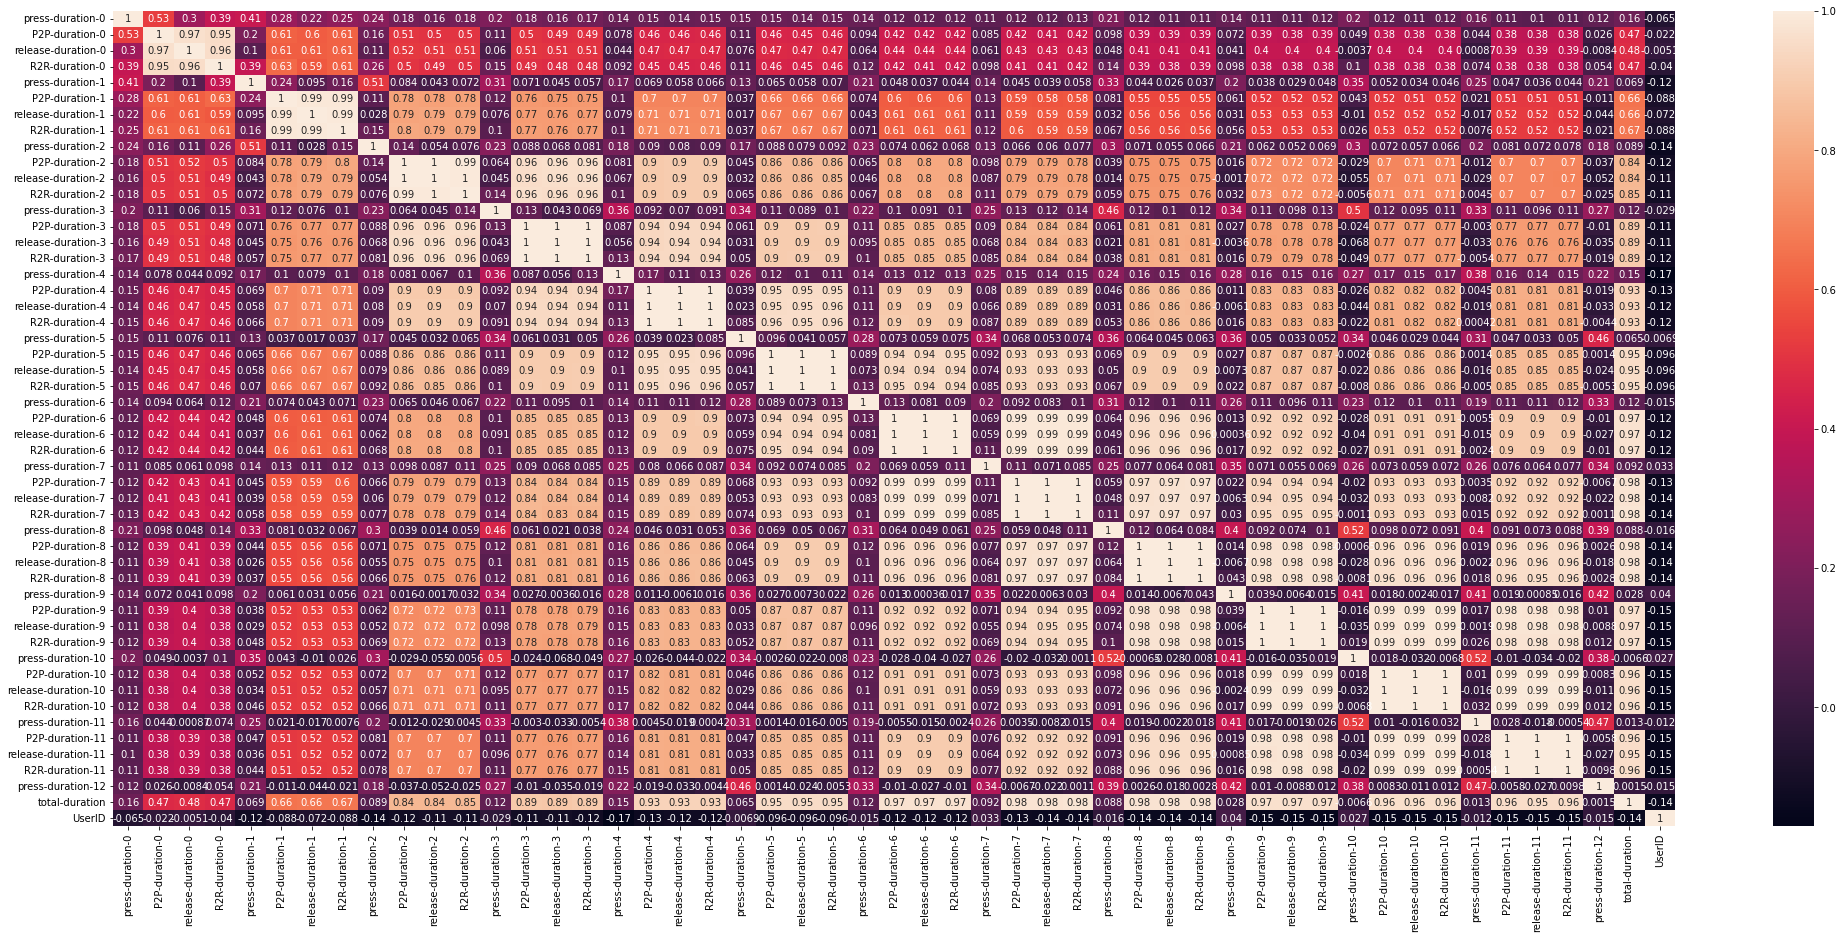

In [13]:
import seaborn as sns

fig = plt.figure(figsize = (35, 15))
ax = sns.heatmap(data_train[col_list].corr(), annot=True)

In [14]:
data_train.columns[:27]

Index(['press-0', 'release-0', 'press-1', 'release-1', 'press-2', 'release-2',
       'press-3', 'release-3', 'press-4', 'release-4', 'press-5', 'release-5',
       'press-6', 'release-6', 'press-7', 'release-7', 'press-8', 'release-8',
       'press-9', 'release-9', 'press-10', 'release-10', 'press-11',
       'release-11', 'press-12', 'release-12', 'UserID'],
      dtype='object')

In [15]:
label = data_train["UserID"]
data_train = data_train.drop(columns=data_train.columns[:27])
features = data_train
features

,press-duration-0,P2P-duration-0,release-duration-0,R2R-duration-0,press-duration-1,P2P-duration-1,release-duration-1,R2R-duration-1,press-duration-2,P2P-duration-2,...,press-duration-10,P2P-duration-10,release-duration-10,R2R-duration-10,press-duration-11,P2P-duration-11,release-duration-11,R2R-duration-11,press-duration-12,total-duration
0,166,252,86,271,185,385,200,296,96,460,...,229,1965,1736,1924,188,2019,1831,2035,204,14464
1,72,268,196,270,74,389,315,417,102,646,...,79,2048,1969,2040,71,2256,2185,2265,80,14619
2,31,449,418,487,69,692,623,695,72,852,...,49,3120,3071,3119,48,3264,3216,3263,47,24994
3,1,2,1,45,44,190,146,201,55,441,...,71,2241,2170,2240,70,2496,2426,2513,87,14812
4,71,383,312,406,94,1923,1829,1926,97,2160,...,176,3960,3784,3911,127,4038,3911,4058,147,33805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,69,286,217,303,86,539,453,525,72,646,...,83,2131,2048,2154,106,2388,2282,2350,68,16439
746,121,379,258,547,289,761,472,669,197,866,...,112,2652,2540,2607,67,2795,2728,2799,71,20448
747,35,830,795,880,85,1044,959,1027,68,1407,...,43,2763,2720,2763,43,2942,2899,2939,40,24330
748,59,234,175,285,110,478,368,444,76,590,...,93,2128,2035,2102,67,2341,2274,2344,70,15609


In [17]:
features = features.astype('int32')

In [63]:
# split train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=55)
print(X_train.shape)
print(X_test.shape)

(600, 50)
(150, 50)


In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

class Trainer:
    def __init__(self, RandomForestRegressor, LinearRegression, Lasso, XGBRegressor, SVR, KNeighborsRegressor, BayesianRidge):
        self.RF = RandomForestRegressor()
        self.LR = LinearRegression()
        self.Lasso = Lasso()
        self.XGBR = XGBRegressor(n_estimators=10)
        self.svr = SVR()
        self.knr = KNeighborsRegressor()
        self.bayesR = BayesianRidge()
    
    def train(self, X_train, y_train, X_test, y_test):
        model_names = [self.RF, self.LR, self.Lasso, self.XGBR, self.svr, self.knr, self.bayesR]
        results = []
        best = model_names[0]
        for model_name in model_names:
            print(f"Processing {str(model_name)} ....")
            result = {
                'Model': str(model_name),
                'R2_Score': float,
                'RMSE': float,
                'MSE': float,
                'MAE': float
            }
            model = model_name.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            #y_pred = scaler.inverse_transform([y_pred])
            score_r2 = r2_score(y_test, y_pred)
            rmse = math.sqrt(mean_squared_error(y_test, y_pred))
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            result['R2_Score'] = score_r2
            result['RMSE'] = rmse
            result['MSE'] = mse
            result['MAE'] = mae

            for item in results:
                if (score_r2 > item['R2_Score']) & (rmse > item['RMSE']):
                    best = model

            results.append(result)
        
        return results, best
        

In [82]:
model_trainer = Trainer(RandomForestRegressor, LinearRegression, Lasso, XGBRegressor, SVR, KNeighborsRegressor, BayesianRidge)
results, best = model_trainer.train(X_train, y_train, X_test, y_test)

Processing RandomForestRegressor() ....
Processing LinearRegression() ....
Processing Lasso() ....
Processing XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None) ....
Processing SVR() ....
Processing KNeighborsRegressor() ....
Processing BayesianRidge() ....


In [83]:
results

[{'Model': 'RandomForestRegressor()',
  'R2_Score': 0.2859712065372897,
  'RMSE': 26.97677560421186,
  'MSE': 727.746422,
  'MAE': 22.488866666666667},
 {'Model': 'LinearRegression()',
  'R2_Score': 0.034670709642900865,
  'RMSE': 31.36677862079423,
  'MSE': 983.8748010459138,
  'MAE': 26.727601672699937},
 {'Model': 'Lasso()',
  'R2_Score': 0.039269921725749724,
  'RMSE': 31.291967512214754,
  'MSE': 979.1872307855036,
  'MAE': 26.472731998976933},
 {'Model': 'XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,\n             colsample_bynode=None, colsample_bytree=None,\n             enable_categorical=False, gamma=None, gpu_id=None,\n             importance_type=None, interaction_constraints=None,\n             learning_rate=None, max_delta_step=None, max_depth=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=10, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=None, reg_alpha=

# Evaluation